#1.)set up

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

I have to sepparate the data from the full data sheet since I want to import it using pandas, which can't read the inturupting headers. To sepparate the data I created a scipt called extractheaders.sh and saved just the end of the headeline numbers in a file that I've loaded bellow to start. I focused on grabbing these numbers because I know they are the start to each data section and I can then count that each header is 13 lines long and I can choose to skip these lines and extract only the data for that section by noting the line the next header starts. 

In [2]:
#load number lines for end of headers from full data 
headerlines=pd.read_table('header_ends.dat')

In [3]:
print(headerlines.head())

     12
0   538
1  1064
2  1590
3  2116
4  2642


In [4]:
#variable for the length of the unseparated data called sabrina.dat
#setting this variable with the len() function would make your code easier to manage if you change anything about your data
#even if you don't change your data, it will make your code more reusable
length_of_file=12624

In [28]:
#this while loop should load your data
#skipped rows is equal to the number of rows at the bottom of the file to skip
skipped_footer = length_of_file
#table will store the each table of data as an item in a list
table = []
#header row is equal to the row that contains the header for the data
header_row = 10
#this loops will continue to go, until all the data has been read
while skipped_footer > 0:
    #shifts the skipped footer down the length of a table 
    skipped_footer -= 526
    #dataframe is the dataframe that contains the data
    dataframe = pd.read_table('sabrina.dat', sep='\s+', header=header_row, skipfooter = skipped_footer, engine='python')
    #appends the dataframe to the list
    table.append(dataframe)
    #save the list of data chunks
    dataframe.to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Bin/data_chunks_list.csv', delimiter=',')
    #shifts the header row to the next table in the data
    header_row += 523


In [ ]:
for chunks in table[]:
    


In [54]:
#First chunk of data:
#Renamed Ampl(JY) to avoide syntax errors
table[0].columns=['Channel','IF','Polar','Frequency','Velocity','Amplitude','Phase']
#converted Ampl from str(because of E) to float 
table[0]['Amplitude']=table[0][1:]['Amplitude'].astype(float)
table[0].head()

Channel  IF Polar  Frequency  Velocity  Amplitude    Phase
0        1   1    RR  1720.8099         0        NaN      NaN
1        2   1    RR  1720.8093         0   0.000259    6.040
2        3   1    RR  1720.8087         0   0.000464  -95.605
3        4   1    RR  1720.8081         0   0.000522 -106.389
4        5   1    RR  1720.8075         0   0.000423  -20.039

In [29]:
#save this table as a file
table[0].to_csv('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Data_chunk0.csv', delimiter='\s+')

#3.)make phase diagrams
Spike in the amplitude is the detection we care about. From that we can look at the phase pts that go with that spike.

/Users/sabrinadesoto/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


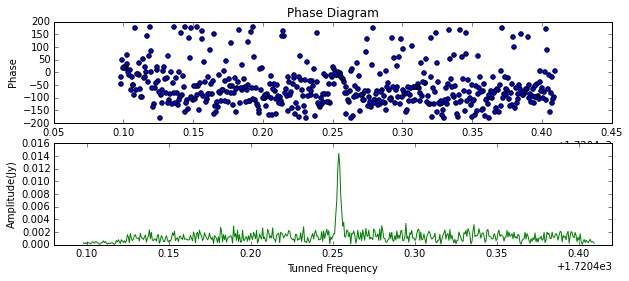

In [64]:
#Plot Channel vs. phase/ampl. for all times
#use multi-pannel plots stacked on eachother

plt.figure(figsize=(10,4))

#subplot 1-phase
plt.subplot (2,1,1)
#need to limit input to each chunk of data
plt.scatter(table[0].Frequency, table[0].Phase)
#I don't want it to show the x-axis?
plt.ylabel('Phase')
plt.title('Phase Diagram')


#subplot 2-ampl.
plt.subplot (2,1,2)
plt.plot(table[0].Frequency, table[0].Amplitude, color='g')
#how do I get the scale to be numbers like 1720....
plt.xlim(1720.48, 1720.82)

plt.xlabel('Tunned Frequency')
plt.ylabel('Amplitude(Jy)')

plt.savefig('/Users/sabrinadesoto/Documents/Sab_Final_Project/Data/Phase_Diagram0.pdf')
plt.show()

In [60]:
#plot for all chunks of data
table[].plot(subplots=True, figsize = (10, 12))

SyntaxError: invalid syntax (<ipython-input-60-5e17247896f8>, line 2)

#4.)isolate detection data pts.

In [ ]:
#find max amplitude(=detect spike)
print(re_ampl.max())#can I include this in detection function?

def detection_phases(resampled):
'''finds coorisponding phase pts. for amplitude spikes indicating a detection'''
#write loop that for all aplitudes greater than () will return the corresponding phase
    if re_ampl > #value?:
        return re_phase

#loop returns only detection phases 
for data in resampled:
    detection=detection_phases(data)
    if detection:
        print(detection_phases(data))

#5.)compare detection for all 30min ave.

In [ ]:
#creat table from all detection data

#first row is the 30minute data collection chunks

#function to grab times from data: 
def get_time(record):
    '''Return (hour,minute) as string'''
    
    #assign variable to capture pattern and capturing
    cp='\s([\s][0-9]|[0-9][0-9])\s([\s][0-9]|[0-9][0-9])\s30.0'#adjust to include day&ave?
    p=re.search(cp, record)
    
    #loop for research to return above pattern
    if p:
        return p.group(1), p.group(2)

#add loop so that no-matches aren't printed
for r in readings:
    #assign variable to function
    time=get_time(r)
    if time:
        print(get_time(r))
        
#column for each are detection data from step 4
#how do I match those detections with a single detection time for each chunk? 

#6.)do some super handy stats 

#7.)do some way cooler physics